# Lesson 10 Assignment
### Jessica Kunkel

As usual, I run the shebang line first. But this time I decided to take the context from the assignment description and add it to the notebook for clarity when describing the dataset.

In [1]:
#!/usr/bin/env python

### Context
#### Data Set Information
Dataset contains 10 variables, all quantitative, 9 predictors and a binary dependent variable, indicating the presence or absence of breast cancer. The predictors are anthropometric data and parameters which can be gathered in routine blood analysis. Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.
#### Attribute Information
|Quantitative	|Attributes	|
|---------------|------------|
|Age			|(years)|
|BMI			|(kg/m2)|
|Glucose		|(mg/dL)|
|Insulin		|(µU/mL)|
|HOMA			|		|	
|Leptin			|(ng/mL)|
|Adiponectin	|(µg/mL)|
|Resistin		|(ng/mL)|
|MCP-1			|(pg/dL)|
#### Labels
- 1 = Healthy Controls
- 2 = Patients


I then import the display functions, set the working directory, and import NumPy and pandas.

In [2]:
""" Import display functions and create a function to print outputs to 
Markdown """

from IPython.display import display, Markdown
def printmd(string):
    display(Markdown(string))

""" Import the os module and set the working directory to where the 
breastcancer.csv file is saved """

import os
path = r"C:\Users\jkunk\OneDrive\Documents\_SWENG Masters\9 DAAN 862 - Analytics Programming Python"
os.chdir(path)

In [3]:
""" Import NumPy, pandas, and dataframe """
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

### 1. Explore the Brest Cancer Data
First, I imported the Breast Cancer dataset. Then I decided to use the dataframe `info`, `describe`, and `head` functions to get an initial feel for the data.

In [4]:
cancer = pd.read_csv("breastcancer.csv")
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


The results of the `info` function show that there are no null values in the dataset, and all of the data is numerical. Therefore I don't need to perform any data wrangling to fix null values.

In [5]:
cancer.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


The results of the `describe` function give important context to the dataset. 

- The mean age of the subjects is 57 years, with a standard deviation of 16 years, a minumum age of 24, and a maximum age of 89.
- The mean BMI of the subjects is 27.58 kg/m<sup>2</sup>, with a standard deviation of 5.02 kg/m<sup>2</sup>, a minimum BMI of 18.37 kg/m<sup>2</sup>, and a maximum BMI of 38.58 kg/m<sup>2</sup>.
- The mean glucose of the subjects is 97.79 mg/dL, with a standard deviation of 22.53 mg/dL, a minimum glucose of 60 mg/dL, and a maximum glucose of 201 mg/dL.
- The mean insulin of the subjects is 10.01 µU/mL, with a standard deviation of 10.07 µU/mL, a minimum insulin of 2.432 µU/mL, and a maximum insulin of 58.46 µU/mL.
- The mean HOMA of the subjects is 2.695, with a standard deviation of 3.642, a minimum HOMA of 0.4674, and a maximum HOMA of 25.05.
- The mean leptin of the subjects is 26.62 ng/mL, with a standard deviation of 4.311 ng/mL, a minimum leptin of 19.18 ng/mL, and a maximum leptin of 90.28 ng/mL.
- The mean adiponectin of the subjects is 10.18 µg/mL, with a standard deviation of 6.843 µg/mL, a minimum adiponectin of 1.656 µg/mL, and a maximum adiponectin of 38.04 µg/mL.
- The mean resistin of the subjects is 14.73 ng/mL, with a standard deviation of 12.39 ng/mL, a minimum resistin of 3.210 ng/mL, and a maximum resistin of 82.10 ng/mL.
- The mean MCP-1 of the subjects is 534.65 pg/dL, with a standard deviation of 345.91 pg/dL, a minimum MCP-1 of 45.843 pg/dL, and a maximum MCP-1 of 1698.4 pg/dL.
- The `describe` function is less useful in giving context to the Classification attribute of the dataset since it is a categorical value of 1 or 2.

In [6]:
cancer.Classification.value_counts()

Classification
2    64
1    52
Name: count, dtype: int64

The `value_counts` function shows that 64 of the subjects (55.2%) are patients, while 52 of the subjects (44.8%) are healthy controls.

Text(0.5, 0, 'Predicted label')

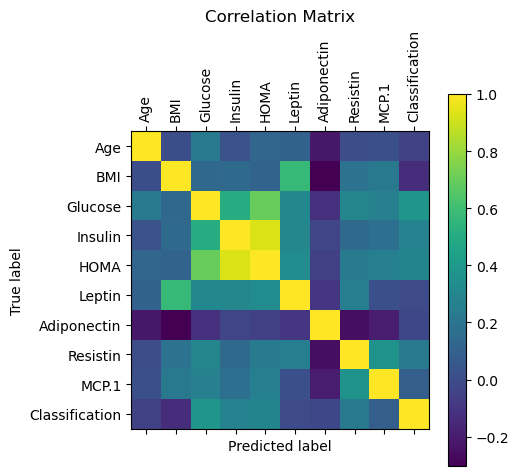

In [7]:
""" Load the necessary packages for logistic regression """
from sklearn.model_selection import train_test_split
from sklearn import metrics

plt.matshow(cancer.corr())
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(10), list(cancer.columns), rotation=90)
plt.yticks(range(10), list(cancer.columns))
plt.ylabel('True label')
plt.xlabel('Predicted label')

The plot of the correlation matrix shows a correlation score of about 0.9 between HOMA and Insulin, as well as a correlation score of about 0.7 between Leptin and BMI as well as HOMA and Glucose.

Next, I generated a scatterplot matrix for the data.

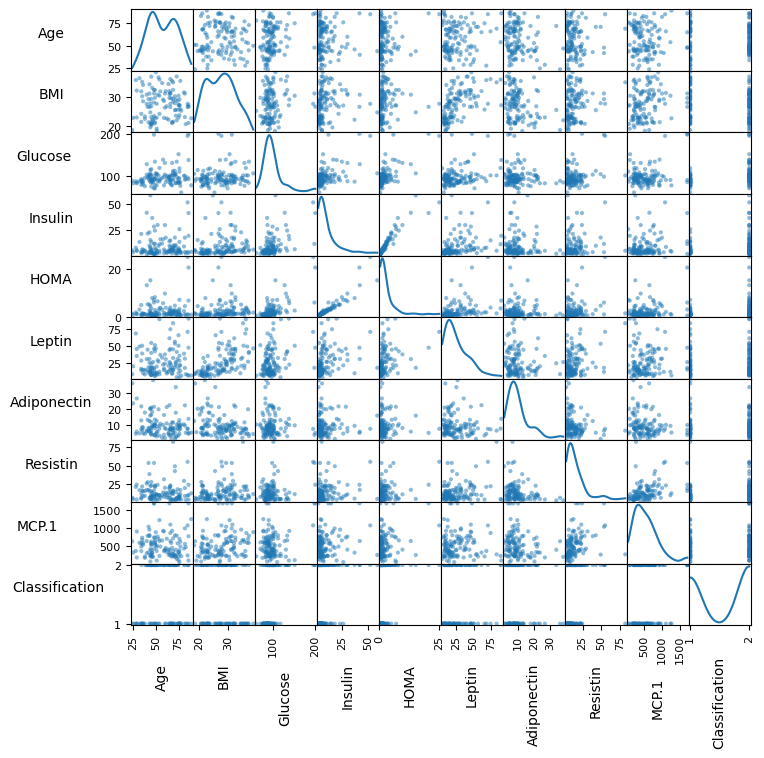

In [8]:
fig = pd.plotting.scatter_matrix(cancer, figsize=[8,8], diagonal='kde')
for ax in fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=90, labelpad=10) 
    ax.set_ylabel(ax.get_ylabel(), rotation=0, labelpad=40)

plt.show()

From the scatterplot matrix, the following observations can be made:
- there is a relatively strong correlation between HOMA and Insulin
- there is a loose positive correlation between BMI and Leptin
- the KDE plot for age has two peaks, around 45 and 70
- the KDE plot for BMI has two peaks, around 20 and close to 30
- the KDE plot for Glucose peaks around 100
- the KDE plot for Insulin peaks close to the y-axis, based on the scale possibly around 0-10
- the KDE plot for HOMA peaks close to 0
- the KDE plot for Leptin peaks close to 25
- the KDE plot for Adiponectin peaks around 10
- the KDE plot for resistin peaks around 10
- the KDE plot for MCP.1 peaks around 500
- each plot has a very different scale, and their values should likely be scaled before being entered into supervised learning algorithms

### 2. Build and evaluate SVC models with different kernel functions

In [9]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = cancer.iloc[:, 0:9]
y = cancer.Classification

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

# Use 30% of the data as the test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [10]:
from sklearn import svm
import sklearn.metrics as metrics

# Kernel = linear
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_linear_pred = svm_linear.predict(X_test)
svm_linear_scores = DataFrame({'Name': ['SVM Linear'], 
                            'Accuracy': [metrics.accuracy_score(y_test, svm_linear_pred)],
                            'Precision': [metrics.precision_score(y_test, svm_linear_pred)],
                            'F1-Score': [metrics.f1_score(y_test, svm_linear_pred)],
                            'Recall': [metrics.recall_score(y_test, svm_linear_pred)],
                            'ROC AUC Score': [metrics.roc_auc_score(y_test, svm_linear_pred)]})

# Kernel = rbf
svm_rbf = svm.SVC(kernel='rbf', gamma=0.1)
svm_rbf.fit(X_train, y_train)
svm_rbf_pred = svm_rbf.predict(X_test)
svm_rbf_scores = DataFrame({'Name': ['SVM RBF'], 
                            'Accuracy': [metrics.accuracy_score(y_test, svm_rbf_pred)],
                            'Precision': [metrics.precision_score(y_test, svm_rbf_pred)],
                            'F1-Score': [metrics.f1_score(y_test, svm_rbf_pred)],
                            'Recall': [metrics.recall_score(y_test, svm_rbf_pred)],
                            'ROC AUC Score': [metrics.roc_auc_score(y_test, svm_rbf_pred)]})

# Kernel = poly
svm_poly = svm.SVC(kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)
svm_poly_pred = svm_poly.predict(X_test)
svm_poly_scores = DataFrame({'Name': ['SVM Polynomial'], 
                            'Accuracy': [metrics.accuracy_score(y_test, svm_poly_pred)],
                            'Precision': [metrics.precision_score(y_test, svm_poly_pred)],
                            'F1-Score': [metrics.f1_score(y_test, svm_poly_pred)],
                            'Recall': [metrics.recall_score(y_test, svm_poly_pred)],
                            'ROC AUC Score': [metrics.roc_auc_score(y_test, svm_poly_pred)]})

compare_scores = pd.concat([svm_linear_scores, svm_rbf_scores, svm_poly_scores], ignore_index=True)
compare_scores


,Name,Accuracy,Precision,F1-Score,Recall,ROC AUC Score
0,SVM Linear,0.857143,0.772727,0.871795,1.000000,0.861111
1,SVM RBF,0.828571,0.866667,0.812500,0.764706,0.826797
2,SVM Polynomial,0.571429,0.625000,0.400000,0.294118,0.563725


From the accuracy scores, we can see that the Linear Support Vector Machine has the best accuracy at 0.857, compared to RBF (acc = 0.829) and quadratic polynomial (acc = 0.571).

The RBF Support Vector Machine has the best prevision at 0.867, compared to the Linear SVM (precision = 0.773) and quadratic polynomial (precision = 0.625).

The Linear SVM has the best F1-Score at 0.872, compared to RBF (f1 = 0.813) and quadratic polynomial (f1 = 0.400).

The Linear SVM also has the best Recall score at 1.00, compared to RBF (recall = 0.765) and quadratic polynomial (recall = 0.294).

The Linear SVM has the best ROC-AUC score at 0.861, compared to RBF (ROC-AUC = 0.826) and quadratic polynomial (ROC-AUC = 0.564).

Overall, it appears that the Linear Support Vector Machine has the best performance of the three models.

### 3. Find the best n_estimator for Random Forests model 

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

n_estimator = range(1,51)
RF_acc_train, RF_acc_test, RF_prec_train, RF_prec_test, RF_rec_train, RF_rec_test, RF_f1_train, RF_f1_test, RF_roc_train, RF_roc_test = (
    [] for _ in range(10))

for i in n_estimator:
    RF = RandomForestClassifier(n_estimators=i, random_state=42)
    scores_train = cross_validate(RF, X_train, y_train, scoring=scoring)
    scores_test = cross_validate(RF, X_test, y_test, scoring=scoring)
    
    RF_acc_train.append(scores_train['test_accuracy'].mean())
    RF_acc_test.append(scores_test['test_accuracy'].mean())

    RF_prec_train.append(scores_train['test_precision'].mean())
    RF_prec_test.append(scores_test['test_precision'].mean())

    RF_rec_train.append(scores_train['test_recall'].mean())
    RF_rec_test.append(scores_test['test_recall'].mean())

    RF_f1_train.append(scores_train['test_f1'].mean())
    RF_f1_test.append(scores_test['test_f1'].mean())
    
    RF_roc_train.append(scores_train['test_roc_auc'].mean())
    RF_roc_test.append(scores_test['test_roc_auc'].mean())

In [12]:
RF_max_acc_train = np.max(np.array(RF_acc_train))
RF_max_acc_test = np.max(np.array(RF_acc_test))
RF_best_n_acc_train = np.argmax(RF_acc_train) + 1
RF_best_n_acc_test = np.argmax(RF_acc_test) + 1

RF_max_prec_train = np.max(np.array(RF_prec_train))
RF_max_prec_test = np.max(np.array(RF_prec_test))
RF_n_prec_train = np.argmax(np.array(RF_prec_train)) + 1
RF_n_prec_test = np.argmax(np.array(RF_prec_test)) + 1

RF_max_rec_train = np.max(np.array(RF_rec_train))
RF_max_rec_test = np.max(np.array(RF_rec_test))
RF_n_rec_train = np.argmax(np.array(RF_rec_train)) + 1
RF_n_rec_test = np.argmax(np.array(RF_rec_test)) + 1

RF_max_f1_train = np.max(np.array(RF_f1_train))
RF_max_f1_test = np.max(np.array(RF_f1_test))
RF_n_f1_train = np.argmax(np.array(RF_f1_train)) + 1
RF_n_f1_test = np.argmax(np.array(RF_f1_test)) + 1

RF_max_roc_train = np.max(np.array(RF_roc_train))
RF_max_roc_test = np.max(np.array(RF_roc_test))
RF_n_roc_train = np.argmax(np.array(RF_roc_train)) + 1
RF_n_roc_test = np.argmax(np.array(RF_roc_test)) + 1


printmd(f'The best n_estimator for the Random Forest model on the Training set is {RF_best_n_acc_train} with an accuracy of {RF_max_acc_train}.')
printmd(f'The best n_estimator for the Random Forest model on the Test set is {RF_best_n_acc_test} with an accuracy of {RF_max_acc_test}.')
printmd(f'The best Precision score for the Random Forest Model on the Training set is {RF_max_prec_train} at n_estimator {RF_n_prec_train}')
printmd(f'The best Precision score for the Random Forest Model on the Test set is {RF_max_prec_test} at n_estimator {RF_n_prec_test}')
printmd(f'The best Recall score for the Random Forest Model on the Training set is {RF_max_rec_train} at n_estimator {RF_n_rec_train}')
printmd(f'The best Recall score for the Random Forest Model on the Test set is {RF_max_rec_test} at n_estimator {RF_n_rec_test}')
printmd(f'The best F1-score for the Random Forest Model on the Training set is {RF_max_f1_train} at n_estimator {RF_n_f1_train}')
printmd(f'The best F1-score for the Random Forest Model on the Test set is {RF_max_f1_test} at n_estimator {RF_n_f1_test}')
printmd(f'The best ROC-AUC score for the Random Forest Model on the Training set is {RF_max_roc_train} at n_estimator {RF_n_roc_train}')
printmd(f'The best ROC-AUC score for the Random Forest Model on the Test set is {RF_max_roc_test} at n_estimator {RF_n_roc_test}')


The best n_estimator for the Random Forest model on the Training set is 9 with an accuracy of 0.7764705882352941.

The best n_estimator for the Random Forest model on the Test set is 35 with an accuracy of 0.7428571428571429.

The best Precision score for the Random Forest Model on the Training set is 0.7503968253968253 at n_estimator 9

The best Precision score for the Random Forest Model on the Test set is 0.7533333333333333 at n_estimator 35

The best Recall score for the Random Forest Model on the Training set is 0.8857142857142858 at n_estimator 4

The best Recall score for the Random Forest Model on the Test set is 0.8833333333333332 at n_estimator 2

The best F1-score for the Random Forest Model on the Training set is 0.7681605975723623 at n_estimator 4

The best F1-score for the Random Forest Model on the Test set is 0.730952380952381 at n_estimator 18

The best ROC-AUC score for the Random Forest Model on the Training set is 0.8396825396825397 at n_estimator 50

The best ROC-AUC score for the Random Forest Model on the Test set is 0.8666666666666668 at n_estimator 28

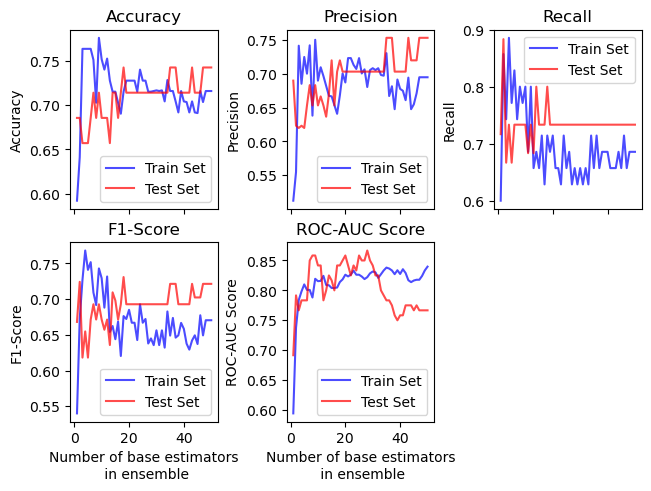

In [13]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    ABC
    DE.
    """,
    sharex=True
)

ax = axd['A']
ax.plot(n_estimator, RF_acc_train, label='Train Set', color='blue', alpha=0.7)
ax.plot(n_estimator, RF_acc_test, label='Test Set', color='red', alpha=0.7)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy')
ax.legend()

ax = axd['B']
ax.plot(n_estimator, RF_prec_train, label='Train Set', color='blue', alpha=0.7)
ax.plot(n_estimator, RF_prec_test, label='Test Set', color='red', alpha=0.7)
ax.set_ylabel('Precision')
ax.set_title('Precision')
ax.legend()

ax = axd['C']
ax.plot(n_estimator, RF_rec_train, label='Train Set', color='blue', alpha=0.7)
ax.plot(n_estimator, RF_rec_test, label='Test Set', color='red', alpha=0.7)
ax.set_ylabel('Recall')
ax.set_title('Recall')
ax.legend()

ax = axd['D']
ax.plot(n_estimator, RF_f1_train, label='Train Set', color='blue', alpha=0.7)
ax.plot(n_estimator, RF_f1_test, label='Test Set', color='red', alpha=0.7)
ax.set_xlabel('Number of base estimators\n in ensemble')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score')
ax.legend()

ax = axd['E']
ax.plot(n_estimator, RF_roc_train, label='Train Set', color='blue', alpha=0.7)
ax.plot(n_estimator, RF_roc_test, label='Test Set', color='red', alpha=0.7)
ax.set_xlabel('Number of base estimators\n in ensemble')
ax.set_ylabel('ROC-AUC Score')
ax.set_title('ROC-AUC Score')
ax.legend()

The random forest model was tested using `n_estimator` values between 1 and 50, and the accuracy, precision, recall, F1-score, and ROC-AUC scores of the model against the train set and the test set were recorded for each n_estimator value.

The accuracy of the random forest model using the train set peaks at 9 n_estimators (acc = 0.776) and then decreases and achieves an inconsistent plateau. The accuracy of the random forest model using the test set increases inconsistently until it peaks at 35 n_estimators (acc = 0.743), then reaches a sort of plateau.

The graph of precision of the random forest model using the train set shows an inconsistent peak and plateau after n_estimators = 9 (prec = 0.750). The graph of precision using the test set shows an increase with a peak at n_estimators = 35 (prec = 0.753). 

The graph of the recall of the random forest model using the train set peaks at n_estimators = 4 (recall = 0.885) and decreases from there to a sort of plateau. The graph of recall using the test set peaks at n_estimator = 2 (recall = 0.883) then decreases to a pleateau.

The graph of the F1-score of the random forest model using the train set peaks at n_estimators = 4 (f1 = 0.768) and decreases to a sort of plateau. The graph of the F1-score using the test set decreases after the first few n_estimator values, peaks at n_estimators = 18 (f1 = 0.731), and remains relatively steady.

The graph of the ROC-AUC score of the random forest model using the train set increases relatively steadily and peaks at n_estimators = 50 (ROC-AUC = 0.840). The graph of the ROC-AUC score using the test set increases, peaks at n_estimators = 28 (ROC_AUC = 0.867), and decreases.

### 4. Find the best n_estimator for Adaboost model

In [14]:
from sklearn.ensemble import AdaBoostClassifier

Ada_acc_train, Ada_acc_test, Ada_prec_train, Ada_prec_test, Ada_rec_train, Ada_rec_test, Ada_f1_train, Ada_f1_test, Ada_roc_train, Ada_roc_test = (
    [] for _ in range(10))

n_estimator = range(1,100)

for i in n_estimator:
    Ada = AdaBoostClassifier(n_estimators=i, learning_rate=0.005, random_state=42)
    
    scores_train = cross_validate(Ada, X_train, y_train, scoring=scoring)
    scores_test = cross_validate(Ada, X_test, y_test, scoring=scoring)
    
    Ada_acc_train.append(scores_train['test_accuracy'].mean())
    Ada_acc_test.append(scores_test['test_accuracy'].mean())

    Ada_prec_train.append(scores_train['test_precision'].mean())
    Ada_prec_test.append(scores_test['test_precision'].mean())

    Ada_rec_train.append(scores_train['test_recall'].mean())
    Ada_rec_test.append(scores_test['test_recall'].mean())

    Ada_f1_train.append(scores_train['test_f1'].mean())
    Ada_f1_test.append(scores_test['test_f1'].mean())
    
    Ada_roc_train.append(scores_train['test_roc_auc'].mean())
    Ada_roc_test.append(scores_test['test_roc_auc'].mean())

In [15]:
Ada_max_acc_train = np.max(np.array(Ada_acc_train))
Ada_max_acc_test = np.max(np.array(Ada_acc_test))
Ada_best_n_acc_train = np.argmax(Ada_acc_train) + 1
Ada_best_n_acc_test = np.argmax(Ada_acc_test) + 1

Ada_max_prec_train = np.max(np.array(Ada_prec_train))
Ada_max_prec_test = np.max(np.array(Ada_prec_test))
Ada_n_prec_train = np.argmax(np.array(Ada_prec_train)) + 1
Ada_n_prec_test = np.argmax(np.array(Ada_prec_test)) + 1

Ada_max_rec_train = np.max(np.array(Ada_rec_train))
Ada_max_rec_test = np.max(np.array(Ada_rec_test))
Ada_n_rec_train = np.argmax(np.array(Ada_rec_train)) + 1
Ada_n_rec_test = np.argmax(np.array(Ada_rec_test)) + 1

Ada_max_f1_train = np.max(np.array(Ada_f1_train))
Ada_max_f1_test = np.max(np.array(Ada_f1_test))
Ada_n_f1_train = np.argmax(np.array(Ada_f1_train)) + 1
Ada_n_f1_test = np.argmax(np.array(Ada_f1_test)) + 1

Ada_max_roc_train = np.max(np.array(Ada_roc_train))
Ada_max_roc_test = np.max(np.array(Ada_roc_test))
Ada_n_roc_train = np.argmax(np.array(Ada_roc_train)) + 1
Ada_n_roc_test = np.argmax(np.array(Ada_roc_test)) + 1


printmd(f'The best n_estimator for the AdaBoost model on the Training set is {Ada_best_n_acc_train} with an accuracy of {Ada_max_acc_train}.')
printmd(f'The best n_estimator for the AdaBoost model on the Test set is {Ada_best_n_acc_test} with an accuracy of {Ada_max_acc_test}.')
printmd(f'The best Precision score for the AdaBoost Model on the Training set is {Ada_max_prec_train} at n_estimator {Ada_n_prec_train}')
printmd(f'The best Precision score for the AdaBoost Model on the Test set is {Ada_max_prec_test} at n_estimator {Ada_n_prec_test}')
printmd(f'The best Recall score for the AdaBoost Model on the Training set is {Ada_max_rec_train} at n_estimator {Ada_n_rec_train}')
printmd(f'The best Recall score for the AdaBoost Model on the Test set is {Ada_max_rec_test} at n_estimator {Ada_n_rec_test}')
printmd(f'The best F1-score for the AdaBoost Model on the Training set is {Ada_max_f1_train} at n_estimator {Ada_n_f1_train}')
printmd(f'The best F1-score for the AdaBoost Model on the Test set is {Ada_max_f1_test} at n_estimator {Ada_n_f1_test}')
printmd(f'The best ROC-AUC score for the AdaBoost Model on the Training set is {Ada_max_roc_train} at n_estimator {Ada_n_roc_train}')
printmd(f'The best ROC-AUC score for the AdaBoost Model on the Test set is {Ada_max_roc_test} at n_estimator {Ada_n_roc_test}')


The best n_estimator for the AdaBoost model on the Training set is 1 with an accuracy of 0.6786764705882353.

The best n_estimator for the AdaBoost model on the Test set is 1 with an accuracy of 0.7714285714285714.

The best Precision score for the AdaBoost Model on the Training set is 0.6494444444444445 at n_estimator 57

The best Precision score for the AdaBoost Model on the Test set is 0.7366666666666666 at n_estimator 1

The best Recall score for the AdaBoost Model on the Training set is 0.6285714285714286 at n_estimator 1

The best Recall score for the AdaBoost Model on the Test set is 0.8333333333333333 at n_estimator 1

The best F1-score for the AdaBoost Model on the Training set is 0.6225867269984917 at n_estimator 1

The best F1-score for the AdaBoost Model on the Test set is 0.769047619047619 at n_estimator 1

The best ROC-AUC score for the AdaBoost Model on the Training set is 0.7184126984126984 at n_estimator 83

The best ROC-AUC score for the AdaBoost Model on the Test set is 0.8083333333333333 at n_estimator 23

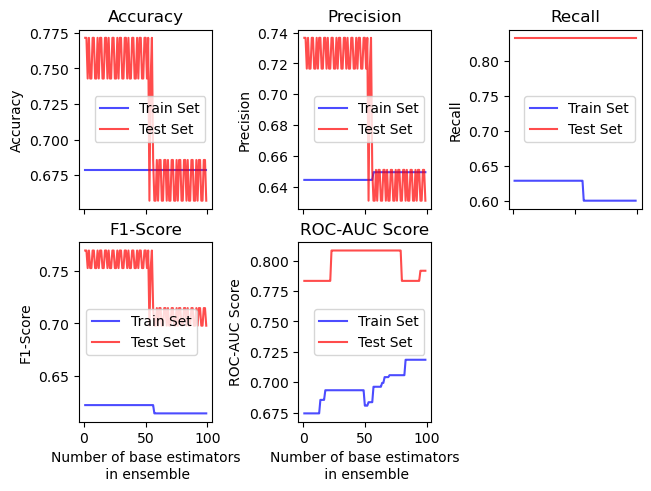

In [16]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    ABC
    DE.
    """,
    sharex=True
)

ax = axd['A']
ax.plot(n_estimator, Ada_acc_train, label='Train Set', color='blue', alpha=0.7)
ax.plot(n_estimator, Ada_acc_test, label='Test Set', color='red', alpha=0.7)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy')
ax.legend()

ax = axd['B']
ax.plot(n_estimator, Ada_prec_train, label='Train Set', color='blue', alpha=0.7)
ax.plot(n_estimator, Ada_prec_test, label='Test Set', color='red', alpha=0.7)
ax.set_ylabel('Precision')
ax.set_title('Precision')
ax.legend()

ax = axd['C']
ax.plot(n_estimator, Ada_rec_train, label='Train Set', color='blue', alpha=0.7)
ax.plot(n_estimator, Ada_rec_test, label='Test Set', color='red', alpha=0.7)
ax.set_ylabel('Recall')
ax.set_title('Recall')
ax.legend()

ax = axd['D']
ax.plot(n_estimator, Ada_f1_train, label='Train Set', color='blue', alpha=0.7)
ax.plot(n_estimator, Ada_f1_test, label='Test Set', color='red', alpha=0.7)
ax.set_xlabel('Number of base estimators\n in ensemble')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score')
ax.legend()

ax = axd['E']
ax.plot(n_estimator, Ada_roc_train, label='Train Set', color='blue', alpha=0.7)
ax.plot(n_estimator, Ada_roc_test, label='Test Set', color='red', alpha=0.7)
ax.set_xlabel('Number of base estimators\n in ensemble')
ax.set_ylabel('ROC-AUC Score')
ax.set_title('ROC-AUC Score')
ax.legend()

The AdaBoost model was tested using n_estimator values between 1 and 100, and the accuracy, precision, recall, F1-score, and ROC-AUC scores of the model against the train set and the test set were recorded for each n_estimator value.

The accuracy of the AdaBoost model using the train set appears to stay at one value (acc = 0.679). The accuracy of the AdaBoost model oscillates between 0.75 and 0.775 before decreasing around n_estimators = 50 and oscillating between 0.65 and 0.675. 

The precision of the AdaBoost model using the train set appears to stay at one value before increasing after n_estimators = 50 to the max precision 0.649. The precision using the test set appears to oscillate between 0.72 and 0.74 before rapidly decreasing to oscillate between 0.63 and 0.65; the max precision for the test set is 0.737 at n_estimators = 57.

The recall of the AdaBoost model using the train set appears to stay at one value before decreasing and staying at a lower value; the maximum recall is 0.629 at n_estimators = 1. The recall using the test set appears to stay at one value, as the maximum is 0.833 at n_estimators = 1.

The F1-score of the AdaBoost model using the train set follows a similar behavior as the recall, with a maximum F1-score 0.623 at n_estimators = 1. The F1-score using the test set oscillates between 0.78 and 0.75 before dropping to oscillate around 0.70; the maximium F1-score is 0.769 at n_estimators = 1.

The ROC-AUC score of the AdaBoost model using the train set gradually but inconsistently increases before reaching a plateau around n_estimators = 80; the maximum ROC-AUC score is 0.718 at n_estimators = 83. The ROC_AUC score using the test set is at a low plateau, increases to one value for a while, then decreases again; the maximum ROC-AUC score is 0.808 at n_estimators = 23.

From the odd behavior of the AdaBoost model, I would presume that the AdaBoost model may not be the best choice for the Breast Cancer dataset.

### Comparison to Lesson 8

Compared to the supervised learning models used in Lesson 8, the Accuracy for both Random Forest (acc = 0.743) and AdaBoost (acc = 0.771) did not perform as well as the Logistic Regression (acc = 0.83) or Decision Tree (acc = 0.80) models.

The Precision of the Random Forest (prec = 0.753) and AdaBoost (prec = 0.737) models did not perform as well as the Logistic Regression (prec = 0.83) or Decision Tree (prec = 0.80) models.

The Recall of the Random Forest (recall = 0.883) and AdaBoost (recall = 0.833) models performed better than the Logistic Regression (recall = 0.73) and Decision Tree (recall = 0.80) models.

The F1-Score of the Random Forest (f1 = 0.731) and AdaBoost (f1 = 0.769) models did not perform as well as the Logistic Regression (f1 = 0.83) or Decision Tree (f1 = 0.80) models.